In [1]:
%matplotlib inline
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import collections
import warnings 
import pandas as pd

In [2]:
dir = '/u/home/gergel/data/parameters'
soil_filename = 'world.soil.parameter.txt'
soil_file = os.path.join(dir, soil_filename)

In [2]:
domain = xr.open_dataset(os.path.join('/u/home/gergel/data/parameters', 
                                      'domain.lnd.wr50a_ar9v4.100920.nc'))

In [3]:
hydro_classes = xr.open_dataset(os.path.join('/u/home/gergel/data/parameters',
                                             'hydroclimate_masks.nc'))

masknan_vals = domain['mask'].where(domain['mask'] == 1).values

runflag gridcell lat lon bi d1 d2 d3 d4 N[1] N[2] N[3] Ksat[1] Ksat[2] Ksat[3] phi_s[1] phi_s[2] phi_s[3] init_moist[1] init_moist[2] init_moist[3] elevation depth[1] depth[2] depth[3] avg_T dp bubble quartz bulk_density[1] bulk_density[2] bulk_density[3] soil_density[1] soil_density[2] soil_density[3] off_gmt Wcr[1] Wcr[2] Wcr[3] Wp[1] Wp[2] Wp[3] surface_roughness snow_roughness annual_prec residual[1] residual[2] residual[3]


In [5]:
names = ['runflag', 'gridcell', 'lat', 'lon', 'bi', 'd1', 'd2', 'd3', 'd4', 'N1', 'N2', 'N3', 'ksat1', 
         'ksat2', 'ksat3', 'phi_s1', 'phi_s2', 'phi_s3', 'init_moist1', 'init_moist2', 'init_moist3', 
         'elevation', 'depth1', 'depth2', 'depth3', 'avg_T', 'dp', 'bubble', 'quartz', 'bulk_density1', 
         'bulk_density2', 'bulk_density3', 'soil_density1', 'soil_density2', 'soil_density3', 'off_gmt', 
         'Wcr1', 'Wcr2', 'Wcr3', 'Wp1', 'Wp2', 'Wp3', 'surface_roughness', 'snow_roughness', 'annual_prec', 
         'residual1', 'residual2', 'residual3']

In [6]:
soil = pd.read_table(soil_file, delim_whitespace=True, names=names)

In [29]:
'''nj = 70
ni = 190
print(old_params['lats'][nj, ni].values)
print(old_params['lons'][nj, ni].values)
print(hydro_classes['polar'][nj, ni].values)'''

"nj = 70\nni = 190\nprint(old_params['lats'][nj, ni].values)\nprint(old_params['lons'][nj, ni].values)\nprint(hydro_classes['polar'][nj, ni].values)"

In [30]:
# df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]
# soil.loc[(soil['lat'] > 68) & (soil['lat'] < 71) & (soil['lon'] < -69) & (soil['lon'] > -73)]

In [13]:
d1 = np.copy(masknan_vals)
d2 = np.copy(masknan_vals)
d3 = np.copy(masknan_vals)
d4 = np.copy(masknan_vals)

# arid
gc = soil.loc[(soil['lat'] > 38) & (soil['lat'] < 40) & (soil['lon'] < 107) & (soil['lon'] > 104)]
d1[np.nonzero(hydro_classes['arid'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['arid'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['arid'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['arid'].values)] = gc['d4'].values[0]

# temperate dry 
gc = soil.loc[(soil['lat'] > 30) & (soil['lat'] < 32) & (soil['lon'] < 116) & (soil['lon'] > 114)]
d1[np.nonzero(hydro_classes['temperate_dry'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['temperate_dry'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['temperate_dry'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['temperate_dry'].values)] = gc['d4'].values[0]

# cold_dry_perma
gc = soil.loc[(soil['lat'] > 55) & (soil['lat'] < 59) & (soil['lon'] < 118) & (soil['lon'] > 115)]
d1[np.nonzero(hydro_classes['cold_dry_perma'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['cold_dry_perma'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['cold_dry_perma'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['cold_dry_perma'].values)] = gc['d4'].values[0]

# cold_dry_noperma
gc = soil.loc[(soil['lat'] > 59) & (soil['lat'] < 62) & (soil['lon'] < 144) & (soil['lon'] > 141)]
d1[np.nonzero(hydro_classes['cold_dry_noperma'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['cold_dry_noperma'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['cold_dry_noperma'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['cold_dry_noperma'].values)] = gc['d4'].values[0]

# cold_wds_ws_perma
gc = soil.loc[(soil['lat'] > 46) & (soil['lat'] < 49) & (soil['lon'] < -117) & (soil['lon'] > -120)]
d1[np.nonzero(hydro_classes['cold_wds_ws_perma'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['cold_wds_ws_perma'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['cold_wds_ws_perma'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['cold_wds_ws_perma'].values)] = gc['d4'].values[0]

# cold_wds_ws_noperma
gc = soil.loc[(soil['lat'] > 52) & (soil['lat'] < 54) & (soil['lon'] < 36) & (soil['lon'] > 34)]
d1[np.nonzero(hydro_classes['cold_wds_ws_noperma'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['cold_wds_ws_noperma'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['cold_wds_ws_noperma'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['cold_wds_ws_noperma'].values)] = gc['d4'].values[0]

# cold_wds_cs_perma
gc = soil.loc[(soil['lat'] > 63) & (soil['lat'] < 66) & (soil['lon'] < 162) & (soil['lon'] > 159)]
d1[np.nonzero(hydro_classes['cold_wds_cs_perma'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['cold_wds_cs_perma'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['cold_wds_cs_perma'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['cold_wds_cs_perma'].values)] = gc['d4'].values[0]

# cold_wds_cs_noperma
gc = soil.loc[(soil['lat'] > 60) & (soil['lat'] < 63) & (soil['lon'] < 24) & (soil['lon'] > 22)]
d1[np.nonzero(hydro_classes['cold_wds_cs_noperma'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['cold_wds_cs_noperma'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['cold_wds_cs_noperma'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['cold_wds_cs_noperma'].values)] = gc['d4'].values[0]

# polar
gc = soil.loc[(soil['lat'] > 68) & (soil['lat'] < 71) & (soil['lon'] < -69) & (soil['lon'] > -73)]
d1[np.nonzero(hydro_classes['polar'].values)] = gc['d1'].values[0]
d2[np.nonzero(hydro_classes['polar'].values)] = gc['d2'].values[0]
d3[np.nonzero(hydro_classes['polar'].values)] = gc['d3'].values[0]
d4[np.nonzero(hydro_classes['polar'].values)] = gc['d4'].values[0]

In [14]:
from netCDF4 import default_fillvals
# define fillvals
fillval_f = default_fillvals['f8']
fillval_i = default_fillvals['i4']

In [15]:
params = xr.Dataset()

params['d1'] = xr.DataArray(d1,
                          dims=('nj', 'ni'),
                          coords={'xc': domain.xc, 'yc': domain.yc},
                          attrs={'description': "Fraction of Dsmax where non-linear baseflow begins", 
                                     'units': "fraction", 'long_name': "Ds"},
                             encoding={"_FillValue": fillval_f,
                                       "Coordinates": "xc yc"})

params['d2'] = xr.DataArray(d2,
                          dims=('nj', 'ni'),
                          coords={'xc': domain.xc, 'yc': domain.yc},
                          attrs={'description': "Fraction of Dsmax where non-linear baseflow begins", 
                                     'units': "fraction", 'long_name': "Ds"},
                             encoding={"_FillValue": fillval_f,
                                       "Coordinates": "xc yc"})

params['d3'] = xr.DataArray(d3,
                          dims=('nj', 'ni'),
                          coords={'xc': domain.xc, 'yc': domain.yc},
                          attrs={'description': "Fraction of Dsmax where non-linear baseflow begins", 
                                     'units': "fraction", 'long_name': "Ds"},
                             encoding={"_FillValue": fillval_f,
                                       "Coordinates": "xc yc"})

params['d4'] = xr.DataArray(d4,
                          dims=('nj', 'ni'),
                          coords={'xc': domain.xc, 'yc': domain.yc},
                          attrs={'description': "Fraction of Dsmax where non-linear baseflow begins", 
                                     'units': "fraction", 'long_name': "Ds"},
                             encoding={"_FillValue": fillval_f,
                                       "Coordinates": "xc yc"})

convert to Ds, Dsmax, Ws, c

In [16]:
new_params = xr.open_dataset(os.path.join('/u/home/gergel/data/parameters', 
                                          'new_vic5_params_20180912.nc'))

In [17]:
porosity = 1 - (new_params['bulk_density_comb'] / new_params['soil_density'])
max_moist = new_params['depth'].isel(nlayer=2) * porosity.isel(nlayer=2) * 1000

In [18]:
dsmax = params['d2'] * ((1 / (max_moist - params['d3']))**(-1*params['d4'])) + (params['d1'] * max_moist)

ds = params['d1'] * (params['d3'] / dsmax)

ws = params['d3'] / max_moist

In [19]:
params['Dsmax'] = xr.DataArray(dsmax,
                          dims=('nj', 'ni'),
                          coords={'xc': domain.xc, 'yc': domain.yc},
                          attrs={'description': "Fraction of Dsmax where non-linear baseflow begins", 
                                     'units': "fraction", 'long_name': "Ds"},
                             encoding={"_FillValue": fillval_f,
                                       "Coordinates": "xc yc"})
params['Ds'] = xr.DataArray(ds,
                          dims=('nj', 'ni'),
                          coords={'xc': domain.xc, 'yc': domain.yc},
                          attrs={'description': "Fraction of Dsmax where non-linear baseflow begins", 
                                     'units': "fraction", 'long_name': "Ds"},
                             encoding={"_FillValue": fillval_f,
                                       "Coordinates": "xc yc"})
params['Ws'] = xr.DataArray(ws,
                          dims=('nj', 'ni'),
                          coords={'xc': domain.xc, 'yc': domain.yc},
                          attrs={'description': "Fraction of Dsmax where non-linear baseflow begins", 
                                     'units': "fraction", 'long_name': "Ds"},
                             encoding={"_FillValue": fillval_f,
                                       "Coordinates": "xc yc"})
params['c'] = xr.DataArray(d4,
                          dims=('nj', 'ni'),
                          coords={'xc': domain.xc, 'yc': domain.yc},
                          attrs={'description': "Fraction of Dsmax where non-linear baseflow begins", 
                                     'units': "fraction", 'long_name': "Ds"},
                             encoding={"_FillValue": fillval_f,
                                       "Coordinates": "xc yc"})

In [25]:
plot_direc = '/u/home/gergel/data/parameters/plots/mtg_20180927'
dpi = 50

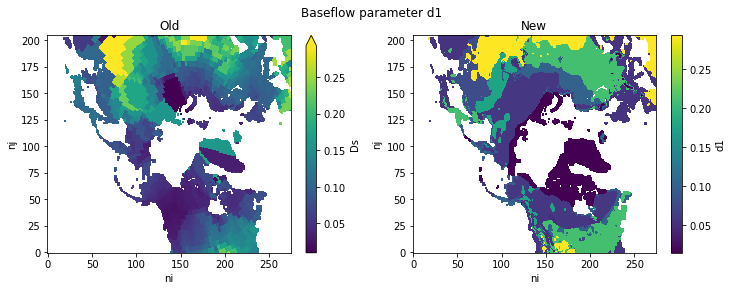

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(axes[0])
new_params['Ds'].plot(robust=True)
axes[0].set_title('old parameters')


plt.sca(axes[1])
params['d1'].plot(robust=True)
axes[1].set_title('new parameters')

axes[0].set_title('Old')
axes[1].set_title('New')

plt.suptitle('Baseflow parameter d1')

plotname = 'd1.png'
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

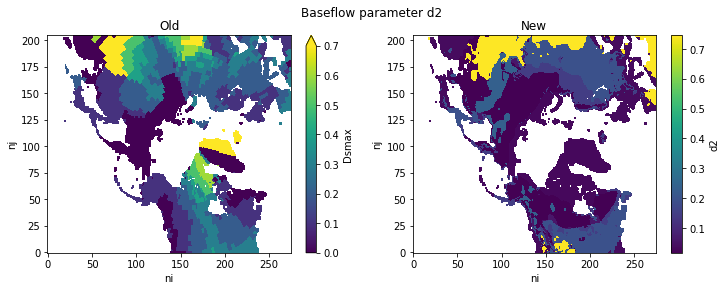

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(axes[0])
new_params['Dsmax'].plot(robust=True)
axes[0].set_title('old parameters')


plt.sca(axes[1])
params['d2'].plot(robust=True)
axes[1].set_title('new parameters')

axes[0].set_title('Old')
axes[1].set_title('New')

plt.suptitle('Baseflow parameter d2')

plotname = 'd2.png'
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

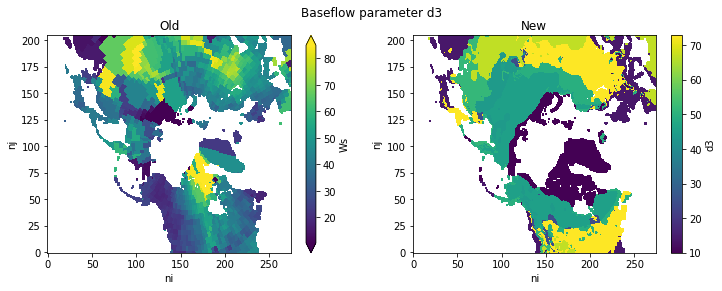

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(axes[0])
new_params['Ws'].plot(robust=True)
axes[0].set_title('old parameters')


plt.sca(axes[1])
params['d3'].plot(robust=True)
axes[1].set_title('new parameters')

axes[0].set_title('Old')
axes[1].set_title('New')

plt.suptitle('Baseflow parameter d3')

plotname = 'd3.png'
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

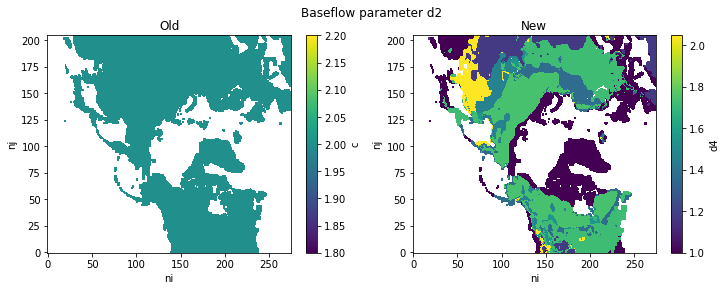

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(axes[0])
new_params['c'].plot(robust=True)
axes[0].set_title('old parameters')


plt.sca(axes[1])
params['d4'].plot(robust=True)
axes[1].set_title('new parameters')

axes[0].set_title('Old')
axes[1].set_title('New')

plt.suptitle('Baseflow parameter d2')

plotname = 'd4.png'
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

In [ ]:
params['d4'].plot()

In [ ]:
soil['d1'].min()

__test_function__

In [4]:
from parameter_functions_v2 import calculate_baseflow_parameters
import pandas as pd 

In [5]:
d1 = calculate_baseflow_parameters(domain, hydro_classes, "d1")

In [6]:
d1

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       ..., 
       [    nan,     nan,     nan, ...,  0.2929,  0.2929,  0.2929],
       [    nan,     nan,     nan, ...,  0.2929,  0.2929,  0.2929],
       [    nan,     nan,     nan, ...,  0.2929,  0.2929,  0.2929]])